In [1]:
import pandas as pd
from amb_sdk.sdk import DarwinSdk

In [2]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

(True, 'https://amb-demo-api.sparkcognition.com/v1/')

In [3]:
#Set your user id and password accordingly
USER='idunlap@rocketmail.com'
PW='5uVGHsTHrQ'

# Set path to datasets - The default below assumes Jupyter was started from amb-sdk/examples/Enterprise/
# Modify accordingly if you wish to use your own data
PATH_TO_DATASET='sets/'
TRAIN_DATASET='17_18_Season_Stats_Per_100_Possessions_SPP.csv'
TEST_DATASET= '16_17_Season_Stats_Per_100_Possessions_SPP.csv'
# A timestamp is used to create a unique name in the event you execute the workflow multiple times or with 
# different datasets.  File names must be unique in Darwin.
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())

In [4]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report


In [5]:
status, msg = ds.auth_login_user(USER,PW)
if not status:
    print(msg)

In [6]:
# Preview dataset
df = pd.read_csv(os.path.join(PATH_TO_DATASET, TRAIN_DATASET))
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,string_field_29,ORtg,DRtg
0,8,Jarrett Allen\allenja01,C,19,BRK,72,31,1441,7.9,13.4,...,13.1,1.7,0.9,3.0,2.8,5.0,19.8,NaN,119.0,108
1,15,Ike Anigbogu\anigbik01,C,19,IND,11,0,30,6.7,15.0,...,15.0,0.0,1.7,5.0,3.3,1.7,21.7,NaN,114.0,104
2,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,6.4,12.5,...,14.0,3.7,1.2,1.5,2.4,5.1,17.5,NaN,116.0,105
3,62,Tony Bradley\bradlto01,C,20,UTA,9,0,29,5.2,19.0,...,19.0,1.7,0.0,0.0,0.0,1.7,13.8,NaN,95.0,107
4,75,Thomas Bryant\bryanth01,C,20,LAL,15,0,72,5.3,14.0,...,11.3,4.0,0.7,1.3,1.3,4.0,14.6,NaN,100.0,108


In [7]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, TRAIN_DATASET))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [8]:
# clean dataset
target = "Pos"
status, job_id = ds.clean_data(TRAIN_DATASET, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T21:33:07.579683', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['8e19d720cb704a02b86858df6cb0e129'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T21:33:07.579683', 'endtime': '2019-04-17T21:33:11.096072', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['8e19d720cb704a02b86858df6cb0e129'], 'model_name': None, 'job_error': ''}


In [9]:
model = target + "_model0" + ts
status, job_id = ds.create_model(dataset_names = TRAIN_DATASET, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T21:33:23.790315', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': None, 'model_name': 'Pos_model020190417213306', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T21:33:23.790315', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 1.3441369533538818, 'generations': 5, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': None, 'model_name': 'Pos_model020190417213306', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T21:33:23.790315', 'endtime': None, 'percent_complete': 16, 'job_type': 'TrainModel', 'loss': 1.3441369533538818, 'generations': 5, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': None, 'model_name': 'Pos_model020190417213306', 'job_error': ''}
{'status': 'Running', 

In [10]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-17T21:35:40.463025', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.3441369533538818, 'generations': 7, 'dataset_names': None, 'artifact_names': ['bd6ccf8e044e400f9d86f51507dc0d9b'], 'model_name': 'Pos_model020190417213306', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T21:35:40.463025', 'endtime': '2019-04-17T21:35:42.158936', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 1.3441369533538818, 'generations': 7, 'dataset_names': None, 'artifact_names': ['bd6ccf8e044e400f9d86f51507dc0d9b'], 'model_name': 'Pos_model020190417213306', 'job_error': ''}


In [11]:
feature_importance[:10]

AST     0.097175
TRB     0.093026
ORB     0.085357
_3PA    0.071663
DRB     0.070617
FG_     0.041528
TOV     0.035923
DRtg    0.030842
_3P     0.030119
BLK     0.029776
dtype: float64

In [12]:
status, artifact = ds.run_model(TRAIN_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Requested', 'starttime': '2019-04-17T21:35:58.145565', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.3441369533538818, 'generations': 7, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['75866451007d40dab680cc2d3f1f1f31'], 'model_name': 'Pos_model020190417213306', 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T21:35:58.145565', 'endtime': '2019-04-17T21:36:06.328416', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.3441369533538818, 'generations': 7, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['75866451007d40dab680cc2d3f1f1f31'], 'model_name': 'Pos_model020190417213306', 'job_error': ''}


(True, 'Job completed')

In [13]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,Pos,prob_C,prob_PF,prob_PG,prob_SF,prob_SG
0,C,0.760297,0.223155,0.003105,0.008730,0.004714
1,C,0.619699,0.284558,0.028857,0.041188,0.025698
2,C,0.888685,0.078118,0.007960,0.019473,0.005763
3,PF,0.182993,0.542127,0.052057,0.138220,0.084603
4,PF,0.311244,0.317626,0.099496,0.235609,0.036024


              precision    recall  f1-score   support

           C       0.77      0.87      0.82       126
          PF       0.70      0.60      0.65       123
          PG       0.80      0.86      0.83       142
          SF       0.74      0.64      0.69       114
          SG       0.72      0.75      0.73       156

   micro avg       0.75      0.75      0.75       661
   macro avg       0.75      0.74      0.74       661
weighted avg       0.75      0.75      0.75       661



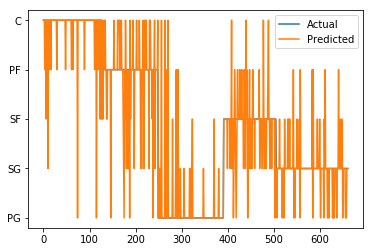

In [14]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [15]:
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, TEST_DATASET))
if not status:
    print(dataset)

In [16]:
# clean test dataset
status, job_id = ds.clean_data(TEST_DATASET, target = target, model_name = model)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T21:36:16.630937', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['e2827a79271e474d99caf67f5f0beed5'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T21:36:16.630937', 'endtime': '2019-04-17T21:36:18.268758', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['e2827a79271e474d99caf67f5f0beed5'], 'model_name': None, 'job_error': ''}


In [17]:
status, artifact = ds.run_model(TEST_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Requested', 'starttime': '2019-04-17T21:36:32.830062', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.3441369533538818, 'generations': 7, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['2444f5d50c524ded981def7cf547d18d'], 'model_name': 'Pos_model020190417213306', 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T21:36:32.830062', 'endtime': '2019-04-17T21:36:41.944674', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.3441369533538818, 'generations': 7, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['2444f5d50c524ded981def7cf547d18d'], 'model_name': 'Pos_model020190417213306', 'job_error': ''}


(True, 'Job completed')

              precision    recall  f1-score   support

           C       0.73      0.81      0.77       114
          PF       0.51      0.47      0.49       129
          PG       0.77      0.86      0.81       117
          SF       0.51      0.36      0.42       110
          SG       0.59      0.67      0.63       124

   micro avg       0.63      0.63      0.63       594
   macro avg       0.62      0.63      0.62       594
weighted avg       0.62      0.63      0.62       594



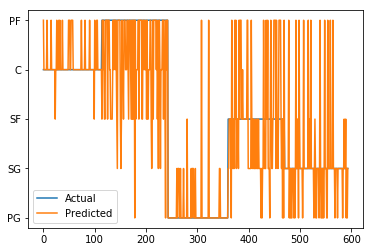

In [18]:
# Create plots comparing predictions with actual target
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(PATH_TO_DATASET, TEST_DATASET))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [19]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.16561132059649739, 'max_delta_step': 0, 'max_depth': 2, 'min_child_weight': 19, 'n_estimators': 287, 'n_jobs': -1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8434167157321979}}
